# Data Exploration
Let's explore the datasets to get a rough idea what kind of data there is, how it might be distributed, and so on

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use("seaborn")
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 1. Raw Data

In [3]:
data_raw = pd.read_csv('./data/sample_raw.csv', parse_dates=["date"],
    index_col="date")

In [3]:
data_raw.shape

(1631389, 77)

In [4]:
data_raw.columns

Index(['permno', 'yy', 'mm', 'ret', 'prc', 'size', 'q10', 'q20', 'q30', 'q40',
       'q50', 'q60', 'q70', 'q80', 'q90', 'd_shrout', 'lme', 'lturnover',
       'ldp', 'beme', 'at', 'c', 'ol', 'pcm', 'prof', 'roe', 'investment',
       'oa', 'free_cf', 'noa', 'roa', 'debt2p', 's2p', 'd_so', 'a2me', 'e2p',
       'eps', 'o2p', 'nop', 'dpi2a', 'ivc', 'rna', 'pm', 'ato', 'cto', 'tan',
       's2c', 'c2d', 'sales_g', 'd_dgm_dsales', 'd_ceq', 'roc', 'aoa', 'roic',
       'ipm', 'sat', 'q', 'spread_mean', 'rel_to_high_price', 'cum_return_1_0',
       'cum_return_12_7', 'cum_return_12_2', 'cum_return_36_13',
       'cum_return_6_2', 'beta', 'dto', 'suv', 'ret_max', 'beta_daily',
       'idio_vol', 'total_vol', 'std_volume', 'std_turn', 'lme_adj',
       'beme_adj', 'pm_adj', 'at_adj'],
      dtype='object')

In [6]:
date_min = data_raw.index.min()
date_max = data_raw.index.max()

print(f'The earliest data point is from: {date_min}')
print(f'The latest data point is from: {date_max}')

The earliest data point is from: 1962-07-31 00:00:00
The latest data point is from: 2014-05-31 00:00:00


In [7]:
data_raw.tail(10)

,permno,yy,mm,ret,prc,size,q10,q20,q30,q40,q50,q60,q70,q80,q90,d_shrout,lme,lturnover,ldp,beme,at,c,ol,pcm,prof,roe,investment,oa,free_cf,noa,roa,debt2p,s2p,d_so,a2me,e2p,eps,o2p,nop,dpi2a,ivc,rna,pm,ato,cto,tan,s2c,c2d,sales_g,d_dgm_dsales,d_ceq,roc,aoa,roic,ipm,sat,q,spread_mean,rel_to_high_price,cum_return_1_0,cum_return_12_7,cum_return_12_2,cum_return_36_13,cum_return_6_2,beta,dto,suv,ret_max,beta_daily,idio_vol,total_vol,std_volume,std_turn,lme_adj,beme_adj,pm_adj,at_adj
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-05-31,93401,2014,5,-0.088091,5.59,327820.00,383518.6,761693.5,1327528.0,2032951.0,3039120.0,4383706.0,6753965.0,11434445.0,27276616.0,0.000000,240032.40,0.070897,0.000000,0.660478,264.779,0.753338,0.617579,0.822953,0.830513,0.171957,0.015931,0.131608,0.127440,0.065419,0.124346,0.000000,0.666546,-0.011301,0.807696,0.098859,0.789726,0.038268,0.031838,0.039793,0.000000,-3.121126,0.212030,-14.720220,0.838390,0.852901,1.095449,0.850853,0.038082,-0.024892,0.148844,-0.054640,0.131608,0.096061,0.211957,0.825243,1.420358,0.002438,0.842033,0.028524,0.381679,0.137405,-0.613284,-0.176796,0.654355,-0.001505,0.092849,0.021523,0.730922,0.016809,0.018020,64461.230,0.164623,-12714652.0,-0.448637,0.183989,0.151665
2014-05-31,93418,2014,5,-0.372287,3.76,555542.30,383518.6,761693.5,1327528.0,2032951.0,3039120.0,4383706.0,6753965.0,11434445.0,27276616.0,0.007051,282877.70,0.098556,0.000000,0.108859,190.898,0.080032,0.708724,0.638539,2.087638,0.295388,0.084555,-0.086595,0.366873,0.738954,0.209471,0.157743,0.355905,-0.193383,0.343625,0.066368,0.699514,0.208256,0.202717,0.066557,0.000000,0.779749,0.271161,2.875593,1.123313,0.279820,12.941480,0.342994,0.121370,-0.017807,-0.533022,29.603180,0.086595,0.258008,0.297866,1.035736,3.593355,0.001699,0.514605,-0.171508,-0.193712,-0.266734,-0.300213,-0.090566,1.117298,-0.000783,-0.466829,0.034483,0.990464,0.017839,0.024392,97953.750,0.207536,-3637936.0,-1.028188,0.139937,0.953279
2014-05-31,93420,2014,5,0.064287,49.50,2969134.00,383518.6,761693.5,1327528.0,2032951.0,3039120.0,4383706.0,6753965.0,11434445.0,27276616.0,-0.000267,4706905.00,0.372694,0.000000,0.327596,2528.794,0.094645,0.078836,0.797690,0.563135,0.210924,0.463946,-0.343920,-0.708984,1.016374,0.088798,0.404158,0.231269,0.009065,0.851694,0.051661,1.642815,0.001076,0.001076,0.670846,0.008065,0.293620,0.403387,0.727887,0.397520,0.582892,2.869030,0.209774,1.078155,0.008624,0.253481,6.853655,0.343920,0.084776,0.358068,0.271540,1.789490,0.000235,0.819993,0.114546,0.555653,0.219106,0.113895,-0.216338,1.883825,-0.006807,-0.368652,0.057059,1.720368,0.015057,0.022128,852451.600,0.842327,-7202727.0,-0.558705,9.870505,-0.339240
2014-05-31,93423,2014,5,0.019681,40.46,3263735.00,383518.6,761693.5,1327528.0,2032951.0,3039120.0,4383706.0,6753965.0,11434445.0,27276616.0,0.000000,3819120.00,0.178034,0.057050,0.293311,3056.391,0.205866,0.234533,0.541312,0.605234,0.352298,0.154149,-0.029654,0.420004,0.795323,0.130934,0.430551,0.327947,-0.015176,0.936470,0.106239,6.501828,0.116766,0.104226,0.034796,0.000458,0.106474,0.191963,0.554658,0.404177,0.436374,1.701078,0.287280,0.056415,0.020479,0.168624,2.552908,0.029654,0.066462,0.197707,0.350195,1.754630,0.000298,0.502001,-0.000249,0.058949,0.157932,1.279311,0.093472,0.947092,-0.005654,-0.034227,0.021480,0.767973,0.010064,0.012751,343404.200,0.362334,152536.2,-0.754309,0.167064,-0.357619
2014-05-31,93426,2014,5,-0.003697,16.17,163214.10,383518.6,761693.5,1327528.0,2032951.0,3039120.0,4383706.0,6753965.0,11434445.0,27276616.0,0.000000,206559.20,0.039122,0.000000,1.216071,263.173,0.356727,0.739396,0.385408,0.422567,0.062300,0.025596,-0.053769,0.075726,0.444609,0.045560,0.069363,1.333316,0.001871,1.612440,0.071630,0.946946,0.000000,0.000000,0.008484,0.001120,0.098318,0.052230,1.882410,0.848058,0.643431,2.317998,0.351872,-0.086058,0.004900,0.064204,-0.945930,0.053769,0.032690,0.048360,0.826893,0.865997,0.001341,0.892739,-0.066168,0.144452,0.212840,-0.131515,0.059756,1.175

In [8]:
data_raw['date'].value_counts() #some dates (days) have 4.5k rows - what are these? diff permutations??

KeyError: 'date'

In [ ]:
# how are prices distributed
data_raw[['prc','size']].hist(bins=20, figsize=(16,5))

#### Observation: Price as well as size are quite evenly distributed

(51607, 77)
prc         71000.0
size    602432919.0
dtype: float64


array([[<AxesSubplot:title={'center':'prc'}>,
        <AxesSubplot:title={'center':'size'}>]], dtype=object)

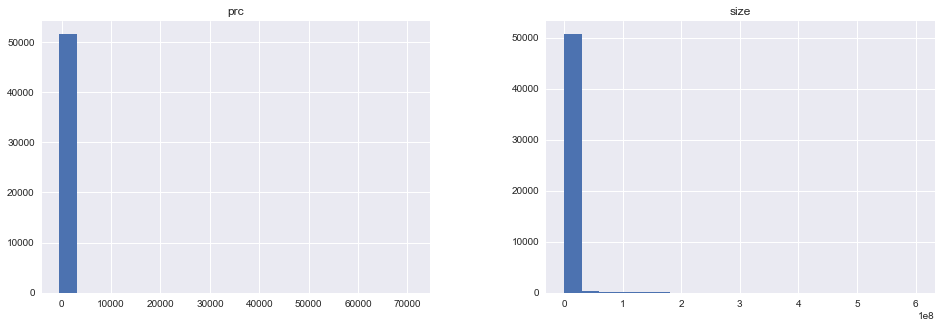

In [7]:
# lets inspect a single year
one_year = data_raw[data_raw['yy']==2000]
print(one_year.shape)
print(one_year[['prc','size']].max())

one_year[['prc','size']].hist(bins=20, figsize=(16,5))

In [ ]:
one_year.plot.scatter('date','prc', figsize=(20,6))

In [ ]:
price_over_20k = one_year[one_year['prc']>20000]
print(price_over_20k.shape)
#one_year.boxplot('prc', figsize=(8,14))

In [ ]:
one_year_clean = one_year.drop(price_over_20k.index)

-> It looks like there are a few (=12, one per month) outliers in price that are way above the bulk of data. Whats the meaning?? <br/>
Try to <b> remove them and look at distribution afterwards </b> <br/>
The picture didn't change much. Lets rather look at the percentiles, ie. 10th, 50th (median) and 90th percentile.

In [ ]:
one_year.boxplot('q50', figsize=(10,8))

In [ ]:
one_year.hist(['q10','q50','q90'], figsize=(20,8))

## 2. PCA Data

In [ ]:
data_pca = pd.read_csv('./data/X_pca.csv')

In [ ]:
data_pca.shape

In [ ]:
data_pca.head()

In [ ]:
data_pca.plot('date', 'pc_0', figsize=(14,7))

In [ ]:
data_raw.plot('date', 'q50', figsize=(14,7))

In [ ]:
#data_raw.plot('date', 'ret', figsize=(14,7))

#### Possible interpretation:
The first PC tries to model the variance of the market prices (here you can see a similar upward trend of PC0 and q50). It would be interesting to know the explained variance ratio

In [ ]:
data_pca.plot('date', 'pc_12', figsize=(14,7))

## 3. Normalized Data

In [ ]:
data_normalized = pd.read_csv('./data/sample_normalized.csv')

In [ ]:
# simple data inspection
print(data_normalized.shape)
print(data_normalized.head(5))

-> It has around the same number of observations and same number of columns, which was expected.
<br/>
Now, lets make some plots. Expectation: Should look like the ones above only with a normalized scale

In [ ]:
data_normalized.hist(['q10','q50','q90'], figsize=(20,8))

In [ ]:
one_year_norm = data_normalized[data_normalized['date']>='2012-12-31']
#one_year_norm.head()
one_year_norm.plot.line(x='date' ,y='total_vol', figsize=(20,8))
one_year_norm.plot.scatter('date','total_vol', figsize=(20,6))

In [ ]:
one_year_norm.plot.line(x='date' ,y='ret', figsize=(20,8))

In [ ]:
one_year_norm['ret'].mean() # on average we have positive return (hard to tell since data has been normalized)

## Processed scaled data 

In [8]:
data_cleaned = pd.read_pickle('./data/data_processed_scaled.pkl')
data_cleaned.shape

(1363261, 68)

In [10]:
mpl.rcParams['lines.color']='k'
mpl.rcParams['lines.linestyle']='solid'
mpl.rcParams['hist.bins'] = 50
%matplotlib inline
mpl.style.use('seaborn')

In [11]:
# aggregate returns over time -> group by date to get all entries for each month
months = data_cleaned.index.get_level_values('date')
portfolio_returns_mean = data_cleaned['ret'].groupby(months).mean()
portfolio_returns_median = data_cleaned['ret'].groupby(months).median()
portfolio_returns_std = data_cleaned['ret'].groupby(months).std()

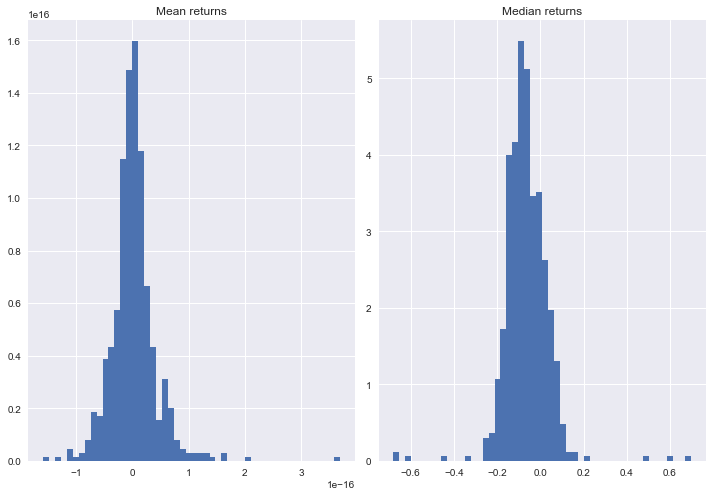

In [12]:
# plot mean vs median returns per month
fig, axs = plt.subplots(1,2, figsize=(10,7))
axs[0].hist(portfolio_returns_mean, density=True)
axs[0].set_title('Mean returns')
axs[1].hist(portfolio_returns_median, density=True)
axs[1].set_title('Median returns')
fig.tight_layout()
plt.show()

In [75]:
portfolio_returns_mean.std()

4.1062155321538055e-17

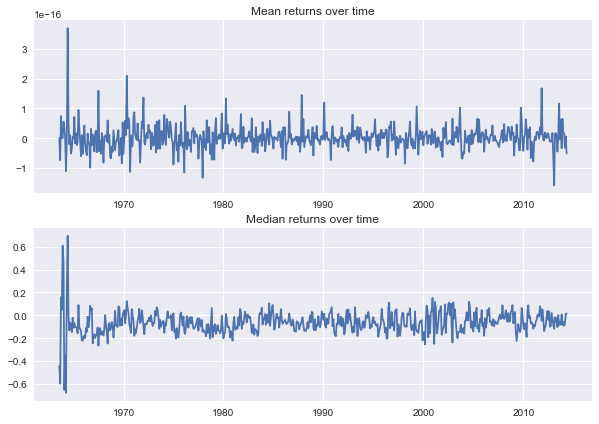

In [98]:
x_min = portfolio_returns_mean.index.min()
x_max = portfolio_returns_mean.index.max()

plt.figure(1, figsize=(10,7))
plt.subplot(211)
plt.title('Mean returns over time')
plt.plot(portfolio_returns_mean)
# plt.hlines(portfolio_returns_mean.std(), xmin=x_min, xmax=x_max, linestyles='dashed', linewidths=1)
# plt.hlines(-portfolio_returns_mean.std(), xmin=x_min, xmax=x_max, linestyles='dashed', linewidths=1)
plt.subplot(212)
plt.title('Median returns over time')
plt.plot(portfolio_returns_median)
# plt.hlines(portfolio_returns_median.std(), xmin=x_min, xmax=x_max, linestyles='dashed', linewidths=1)
# plt.hlines(-portfolio_returns_median.std(), xmin=x_min, xmax=x_max, linestyles='dashed', linewidths=1)
plt.savefig('figures/mean_median_returns.png')


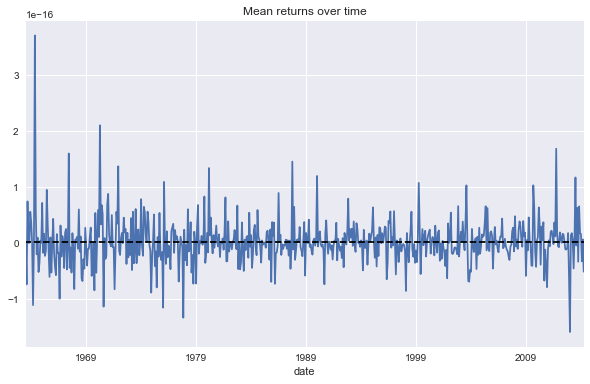

In [92]:
# plot mean returns over time -> group by permno
plt.figure(figsize=(10,6))
portfolio_returns_mean.plot()
#portfolio_returns_median.plot(c='r')
plt.title('Mean returns over time')
plt.hlines(portfolio_returns_mean.mean(), xmin=-100, xmax=2014, linestyles='dashed')

Text(0.5, 1.0, 'Median returns over time')

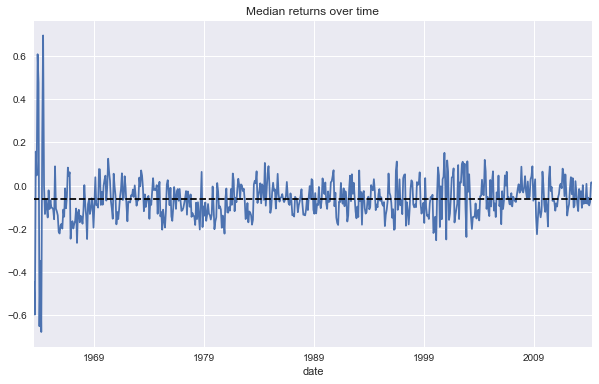

In [93]:
# plot median returns over time
plt.figure(figsize=(10,6))
portfolio_returns_median.plot()
plt.hlines(portfolio_returns_median.mean(), xmin=-100, xmax=2014, linestyles='dashed')
plt.title('Median returns over time')

In [110]:
correlations_with_target

cum_return_1_0      -0.000765
cum_return_6_2       0.013072
cum_return_12_2      0.014190
cum_return_12_7      0.008699
cum_return_36_13    -0.016863
investment          -0.014077
d_ceq               -0.006870
dpi2a               -0.010128
d_shrout             0.003061
ivc                 -0.009884
noa                 -0.009886
ato                  0.000428
cto                  0.003376
d_dgm_dsales         0.000557
eps                 -0.002556
ipm                 -0.002454
pcm                 -0.001941
pm                  -0.003036
pm_adj              -0.001164
prof                 0.007875
rna                 -0.003681
roa                 -0.010294
roc                 -0.002811
roe                 -0.003237
roic                -0.010034
s2c                  0.000760
sat                  0.009053
at_adj               0.008495
aoa                 -0.000170
ol                   0.010534
tan                  0.005202
oa                  -0.001094
a2me                 0.003598
beme      

In [123]:
import pickle

# get the 20 variables that are most correlated with the target
correlations_with_target = data_corr['TARGET'].rename('corr with target')
correlations_with_target_abs = correlations_with_target.abs()
correlations_with_target_abs = correlations_with_target_abs.rename('corr with target abs')
correlations = pd.concat([correlations_with_target, correlations_with_target_abs], axis=1)
correlations = correlations.sort_values(by='corr with target abs', ascending=False)
correlations.drop('TARGET', axis=0, inplace=True)
correlations[:21]

# save data for later
# with open('figures/exploration/variable_correlation_with_target.pkl', 'wb') as f:
#     pickle.dump(correlations, f)

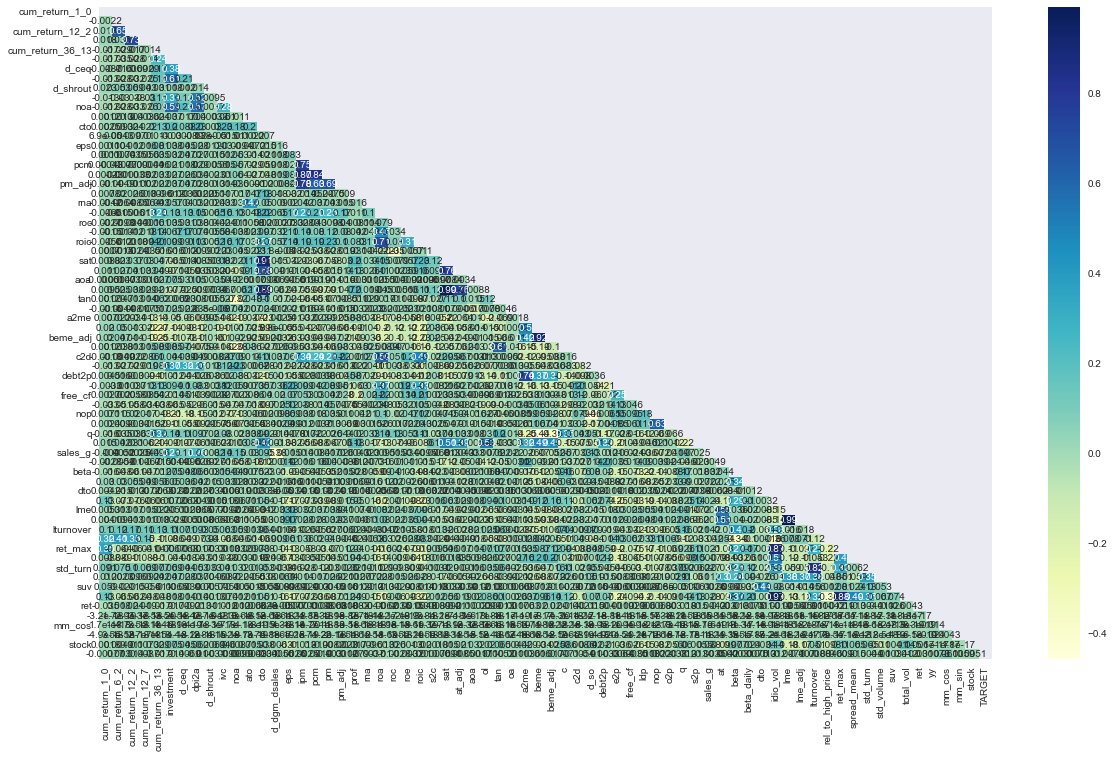

In [103]:
# plot triangular correlation heatmap of all variables 
data_corr = data_cleaned.copy()
data_corr.drop(['stock', 'yy', 'mm_cos', 'mm_sin'], axis=1)
data_corr = data_cleaned.corr()

# creating mask
mask = np.triu(np.ones_like(data_corr))

plt.figure(figsize=(20,12))

# plotting a triangle correlation heatmap
dataplot = sns.heatmap(data_corr, cmap="YlGnBu", annot=True, mask=mask)

# displaying heatmap
plt.show()

## Explore returns for data description

In [131]:
data_raw['ret'].describe()

count    1.631389e+06
mean     1.333871e-02
std      1.671166e-01
min     -9.812950e-01
25%     -6.153846e-02
50%      0.000000e+00
75%      7.182320e-02
max      2.400000e+01
Name: ret, dtype: float64

In [32]:
print("Raw returns statistics: ", data_raw['ret'].describe())
#print("Processed returns statistics: ", data_cleaned['ret'].describe())
print("Processed target statistics: ", data_cleaned['TARGET'].describe())

Raw returns statistics:  count    1.631389e+06
mean     1.333871e-02
std      1.671166e-01
min     -9.812950e-01
25%     -6.153846e-02
50%      0.000000e+00
75%      7.182320e-02
max      2.400000e+01
Name: ret, dtype: float64
Processed target statistics:  count    1.363261e+06
mean     1.436644e-02
std      1.407485e-01
min     -9.812950e-01
25%     -5.350722e-02
50%      5.868545e-03
75%      7.077536e-02
max      9.373627e+00
Name: TARGET, dtype: float64


Text(0.5, 1.0, 'Monthly stock returns')

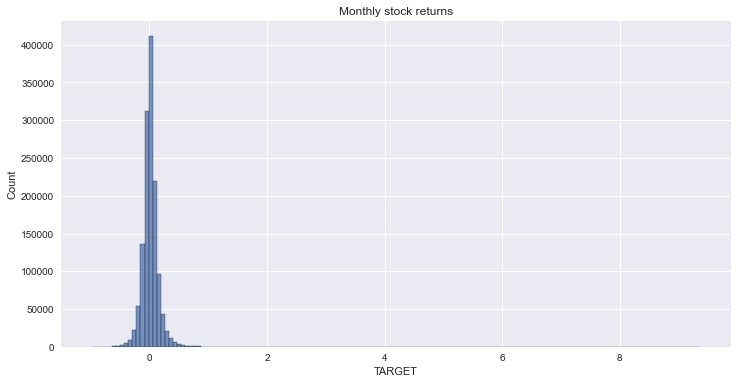

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(data_cleaned['TARGET'], bins = 150)
plt.savefig(f'figures/exploration/histplot_target_clean')
plt.title('Monthly stock returns')

c:\Users\ASUS\anaconda3\envs\ml-seminar\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(-1.4990411, 6.0)

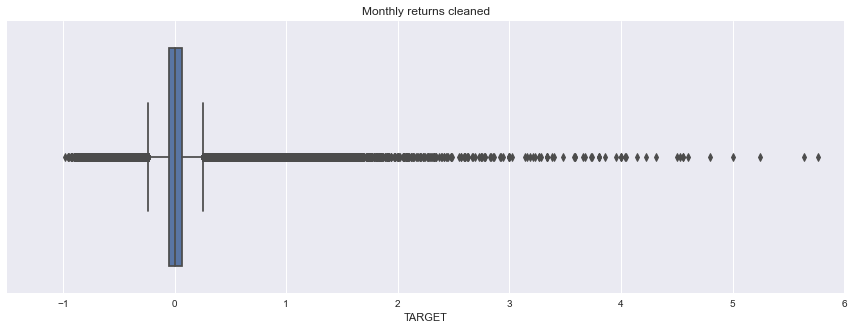

In [65]:
# plot only TARGET cleaned
plt.figure(figsize=(15,5))
sns.boxplot(data_cleaned['TARGET'])
plt.title('Monthly returns cleaned')
plt.xlim(right=6)

c:\Users\ASUS\anaconda3\envs\ml-seminar\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


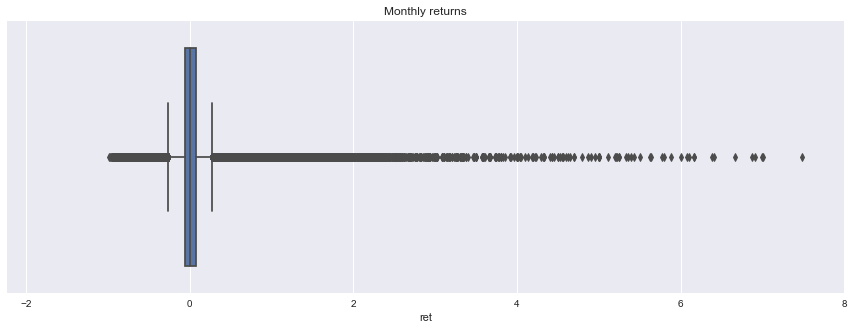

In [58]:
# plot only TARGET cleaned
plt.figure(figsize=(15,5))
sns.boxplot(data_raw['ret'])
plt.title('Monthly returns')
plt.xlim(right=8)
plt.savefig('figures/exploration/boxplot_returns_raw.png') # used in paper

In [59]:
# summary statistics
ret_stats = data_raw['ret'].describe()
print(ret_stats)
ret_stats_dict = {
    'Mean': round(ret_stats[1], 2),
    'Median': round(ret_stats[-3],2),
    'Std': round(ret_stats[2],2),
    'Min': round(ret_stats[3],2),
    'Max': round(ret_stats[-1],2)
}

print(ret_stats_dict)
print("Var: ", ret_stats_dict['Std']**2)

count    1.631389e+06
mean     1.333871e-02
std      1.671166e-01
min     -9.812950e-01
25%     -6.153846e-02
50%      0.000000e+00
75%      7.182320e-02
max      2.400000e+01
Name: ret, dtype: float64
{'Mean': 0.01, 'Median': 0.0, 'Std': 0.17, 'Min': -0.98, 'Max': 24.0}
Var:  0.028900000000000006


c:\Users\ASUS\anaconda3\envs\ml-seminar\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-2.0, 10.0)

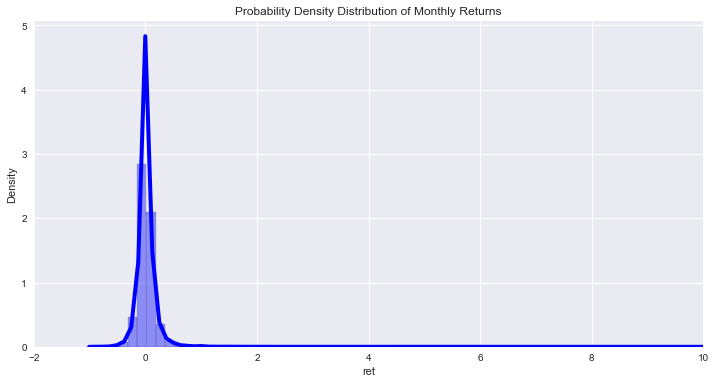

In [62]:
plt.figure(figsize=(12,6))
# Density Plot and Histogram of returns
sns.distplot(data_raw['ret'], hist=True, kde=True, 
             bins=int(150), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}
            )
plt.title('Probability Density Distribution of Monthly Returns')
plt.xlim(-2, 10)
#plt.savefig('pdf_returns_raw.png')

In [134]:
#### Use cleaned data insted and inverse transform it onto original scale
data_processed_scaled = pd.read_pickle('data/data_processed_scaled.pkl')
scaler = pd.read_pickle('data/rank_standard_scaler_x.pkl')

In [137]:
data_processed_scaled.columns

Index(['cum_return_1_0', 'cum_return_6_2', 'cum_return_12_2',
       'cum_return_12_7', 'cum_return_36_13', 'investment', 'd_ceq', 'dpi2a',
       'd_shrout', 'ivc', 'noa', 'ato', 'cto', 'd_dgm_dsales', 'eps', 'ipm',
       'pcm', 'pm', 'pm_adj', 'prof', 'rna', 'roa', 'roc', 'roe', 'roic',
       's2c', 'sat', 'at_adj', 'aoa', 'ol', 'tan', 'oa', 'a2me', 'beme',
       'beme_adj', 'c', 'c2d', 'd_so', 'debt2p', 'e2p', 'free_cf', 'ldp',
       'nop', 'o2p', 'q', 's2p', 'sales_g', 'at', 'beta', 'beta_daily', 'dto',
       'idio_vol', 'lme', 'lme_adj', 'lturnover', 'rel_to_high_price',
       'ret_max', 'spread_mean', 'std_turn', 'std_volume', 'suv', 'total_vol',
       'ret', 'yy', 'mm_cos', 'mm_sin', 'stock', 'TARGET'],
      dtype='object')

In [148]:
def transform(x):
    x = scaler.transform(x)
    return x

In [168]:
print(data_processed_rescaled.groups.values)

<built-in method keys of PrettyDict object at 0x000002445472A040>


In [172]:
print(f"Scalers shape is: {scaler.shape}")

data_selected = data_processed_scaled[['ret', 'd_shrout', 'lme']]

data_processed_rescaled = data_selected['ret'].groupby('date', sort=False)#.apply(lambda x: transform(x))

print(f"Shape of scaled data: {len(data_processed_rescaled)}")

# i=0
# for month in scaler:
#    data_processed_rescaled.groups[i]=month.transform(data_processed_rescaled.groups.values[i])
data_processed_rescaled.groups=scaler.transform(data_processed_rescaled.groups.values)

Scalers shape is: (610,)
Shape of scaled data: 610


TypeError: values() takes no arguments (1 given)

## Open questions:
- In general, what are we pricing?
- What are permutations? permno (movements?) and how to interpret several observations per day?
- Which are the variables of interest?
- Which features might be interesting to model these?
- How to handle the big amount of observations (n=1.6m)? Can we aggregate over days/months without loosing too much info? 
- What exactly is the meaning of percentiles? e.g. q50 is median price, size??
- What information do the PCs contain? How could we use them?

## Feature correlation

In [ ]:
data_corr = data_normalized.corr()

In [ ]:
# plot triangular correlation heatmap of all variables 
data_corr = data_normalized.corr()

# creating mask
mask = np.triu(np.ones_like(data_corr))

plt.figure(figsize=(20,12))

# plotting a triangle correlation heatmap
dataplot = sns.heatmap(data_corr, cmap="YlGnBu", annot=True, mask=mask)

# displaying heatmap
plt.show()

In [ ]:
data_corr[data_corr!=1.0].abs().max()

## Random exploration

In [ ]:
# Cyclic encoding
for i in range(12):
    print(i%12)